# <h1 align="center">Regression Project</h1>
# <h1 align="center">Erfan Aliannezhadi</h1>

### Introduction
In this project, we use the Tehran houses dataset, which includes the real information of 4000 houses in Tehran.
Our goal is to build a regression model to predict house prices in Tehran.

### Introduction of data set features
* **Area**: house area in meters
* **Room**: The number of bedrooms in the house
* **Parking**: Is there a parking or not?
* **Warehouse**: Is there a Warehouse or not?
* **Elevator**: Is there a Elevator or not?
* **Address**: house region in tehran
* **Price**: House price in Tomans
* **Price(USD)**: House price in dollars


<p>First, we do the necessary imports</p>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

Then we study our dataset

In [3]:
df = pd.read_csv('house-price.csv', dtype={'Address': 'category'},
                 usecols=['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price'])
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,True,True,True,Shahran,1.850000e+09
1,60,1,True,True,True,Shahran,1.850000e+09
2,79,2,True,True,True,Pardis,5.500000e+08
3,95,2,True,True,True,Shahrake Qods,9.025000e+08
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09
...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09
3475,83,2,True,True,True,Niavaran,6.800000e+09
3476,75,2,False,False,False,Parand,3.650000e+08
3477,105,2,True,True,True,Dorous,5.600000e+09


In [4]:
df.describe()

,Room,Price
count,3479.000000,3.479000e+03
mean,2.079908,5.359023e+09
std,0.758275,8.099935e+09
min,0.000000,3.600000e+06
25%,2.000000,1.418250e+09
50%,2.000000,2.900000e+09
75%,2.000000,6.000000e+09
max,5.000000,9.240000e+10


In this dataset, some values of the Area column are mistakenly too large. Therefore, we delete them

In [5]:
df[df['Area'].apply(lambda x: not x.isdigit())]


,Area,Room,Parking,Warehouse,Elevator,Address,Price
570,"3,310,000,000",2,True,True,True,Ostad Moein,3.310000e+09
709,"16,160,000,000",3,True,True,True,Pasdaran,1.616000e+10
807,"1,000",2,True,True,False,Damavand,7.000000e+09
1604,"8,400,000,000",2,True,True,True,Gheitarieh,8.700000e+09
2171,"3,600",2,False,False,False,Shahryar,9.720000e+09
2802,"2,550,000,000",2,True,True,True,Central Janatabad,2.550000e+09


We can see that these values are not in numeric format and they are very large numbers, so we delete them

In [6]:
df = df[df['Area'].apply(lambda x: x.isdigit())]

In [7]:
df['Area'] = df['Area'].astype('int64')

C:\Users\Erfan Aliannezhadi\AppData\Local\Temp\ipykernel_15388\4049037255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Area'] = df['Area'].astype('int64')


### Select Features

We can see that none of the independent variables have a high correlation with each other and also all the independent variables have sufficient correlation with the response variable, so we need all the variables in the model.

In [8]:
df.corr(numeric_only=True)

,Area,Room,Parking,Warehouse,Elevator,Price
Area,1.000000,0.672959,0.197698,0.076829,0.052384,0.722647
Room,0.672959,1.000000,0.274952,0.129956,0.181718,0.567610
Parking,0.197698,0.274952,1.000000,0.430804,0.430893,0.190532
Warehouse,0.076829,0.129956,0.430804,1.000000,0.201921,0.109971
Elevator,0.052384,0.181718,0.430893,0.201921,1.000000,0.111861
Price,0.722647,0.567610,0.190532,0.109971,0.111861,1.000000


Now let's check the Address column

In [9]:
df = df[df['Address'].notna()]
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,True,True,True,Shahran,1.850000e+09
1,60,1,True,True,True,Shahran,1.850000e+09
2,79,2,True,True,True,Pardis,5.500000e+08
3,95,2,True,True,True,Shahrake Qods,9.025000e+08
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09
...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09
3475,83,2,True,True,True,Niavaran,6.800000e+09
3476,75,2,False,False,False,Parand,3.650000e+08
3477,105,2,True,True,True,Dorous,5.600000e+09


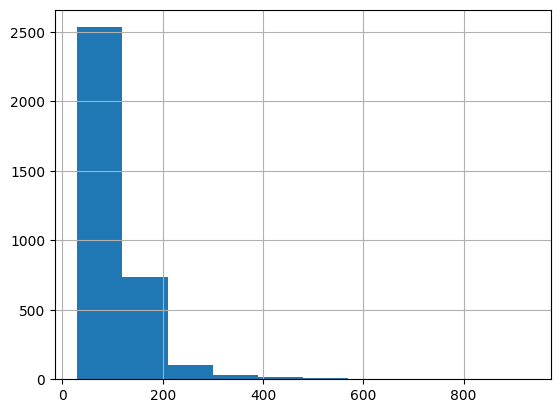

In [12]:
df['Area'].hist()
plt.show()

then we remove area values bigger than 400

In [13]:
df = df[df['Area'] < 400]

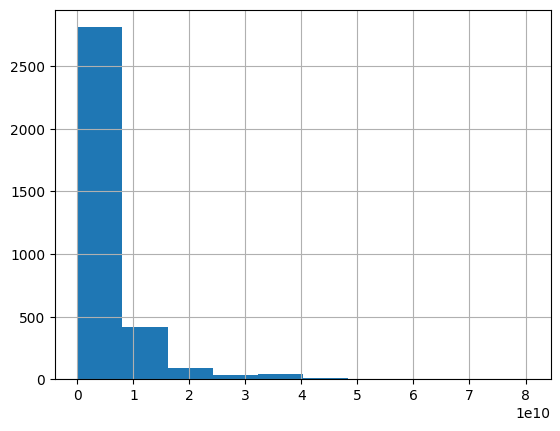

In [14]:
df['Price'].hist()
plt.show()

In [17]:
df = df[df['Price'] < 40000000000]

Now we will visualize the independent variables with the response variable

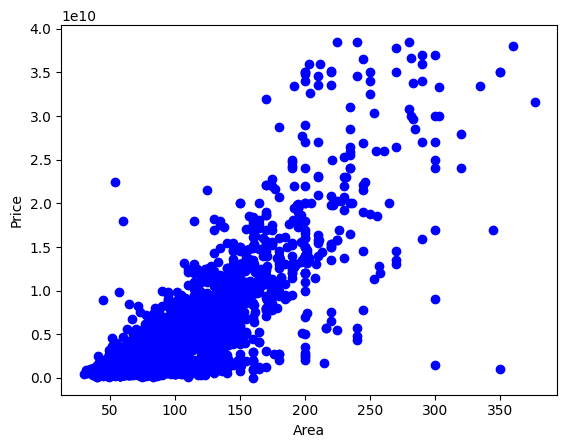

In [18]:
plt.scatter(df['Area'], df['Price'], color='blue')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

It can be seen that they have a linear and direct relationship

and then we handle the boolean features

In [19]:
df['Elevator'] = df['Elevator'].astype(int)
df['Warehouse'] = df['Warehouse'].astype(int)
df['Parking'] = df['Parking'].astype(int)
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,1,1,1,Shahran,1.850000e+09
1,60,1,1,1,1,Shahran,1.850000e+09
2,79,2,1,1,1,Pardis,5.500000e+08
3,95,2,1,1,1,Shahrake Qods,9.025000e+08
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09
...,...,...,...,...,...,...,...
3474,86,2,1,1,1,Southern Janatabad,3.500000e+09
3475,83,2,1,1,1,Niavaran,6.800000e+09
3476,75,2,0,0,0,Parand,3.650000e+08
3477,105,2,1,1,1,Dorous,5.600000e+09


and finally we handle Address feature

In [20]:
encoder = OneHotEncoder(sparse_output=False)
onehot_encoded = encoder.fit_transform(df[["Address"]])
onehot_encoded


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
X = np.asanyarray(df[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator']])
X = np.hstack([X, onehot_encoded])
Y = np.asanyarray(df['Price'])
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

now we train the model
We use regularization to avoid overfit

In [22]:
reg = linear_model.Ridge(alpha=0.1)
reg.fit(x_train, y_train)
print(f"Coefficients: {reg.coef_[:5]}")
print(f"Intercept: {reg.intercept_}")

Coefficients: [ 8.50175459e+07 -8.00301151e+08 -3.39766465e+08 -2.12457766e+08
 -1.82765898e+08]
Intercept: -2168900035.2926283


and finally we test the model

In [24]:
y_hat_train = reg.predict(x_train)
y_hat_test = reg.predict(x_test)
print("Residual sum of squares: %.2f"
      % np.mean((y_hat_test - y_test) ** 2))
print('R2 score for test: %.2f' % r2_score(y_test, y_hat_test))
print('R2 score for train: %.2f' % r2_score(y_train, y_hat_train))

Residual sum of squares: 7364104701281015808.00
R2 score for test: 0.79
R2 score for train: 0.84


we can see we have no overfitting

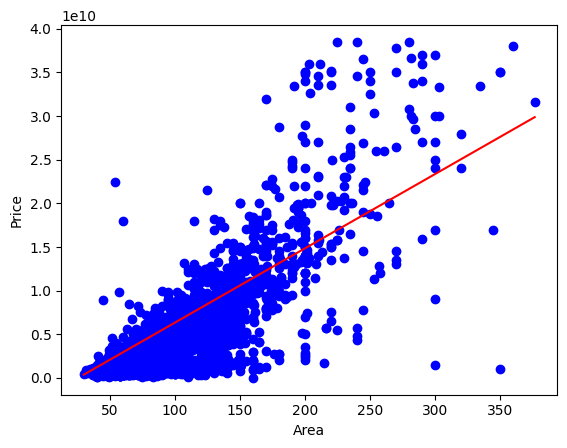

In [29]:
plt.scatter(df['Area'], df['Price'], color='blue')
x_range = np.linspace(df['Area'].min(), df['Area'].max(), 100000)
plt.plot(x_range, reg.coef_[0] * x_range + reg.intercept_, '-r')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()